<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/CSD2045/Illustrating_duration_vs_bandwidth_tradeoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook illustrated tradeoffs between signal duration and bandwidth in the context of soun stimuli used for auditory brainstem response testing


<ipython-input-11-92f0a6d3ff9a>:143: RuntimeWarning: divide by zero encountered in log10
  pl.plot(f / 1000., 10 * np.log10(S_click/np.max(S_click)), linewidth=2,


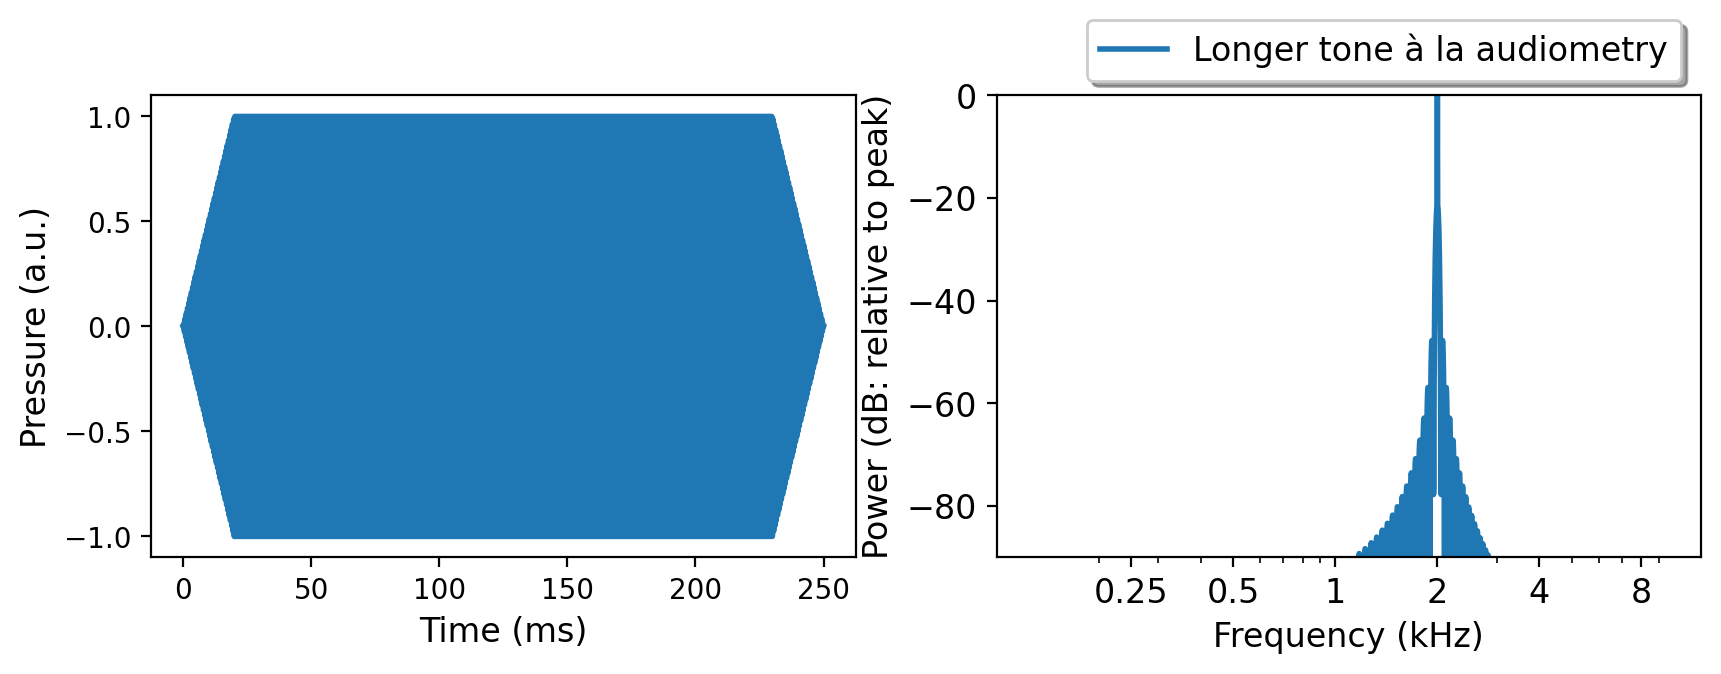

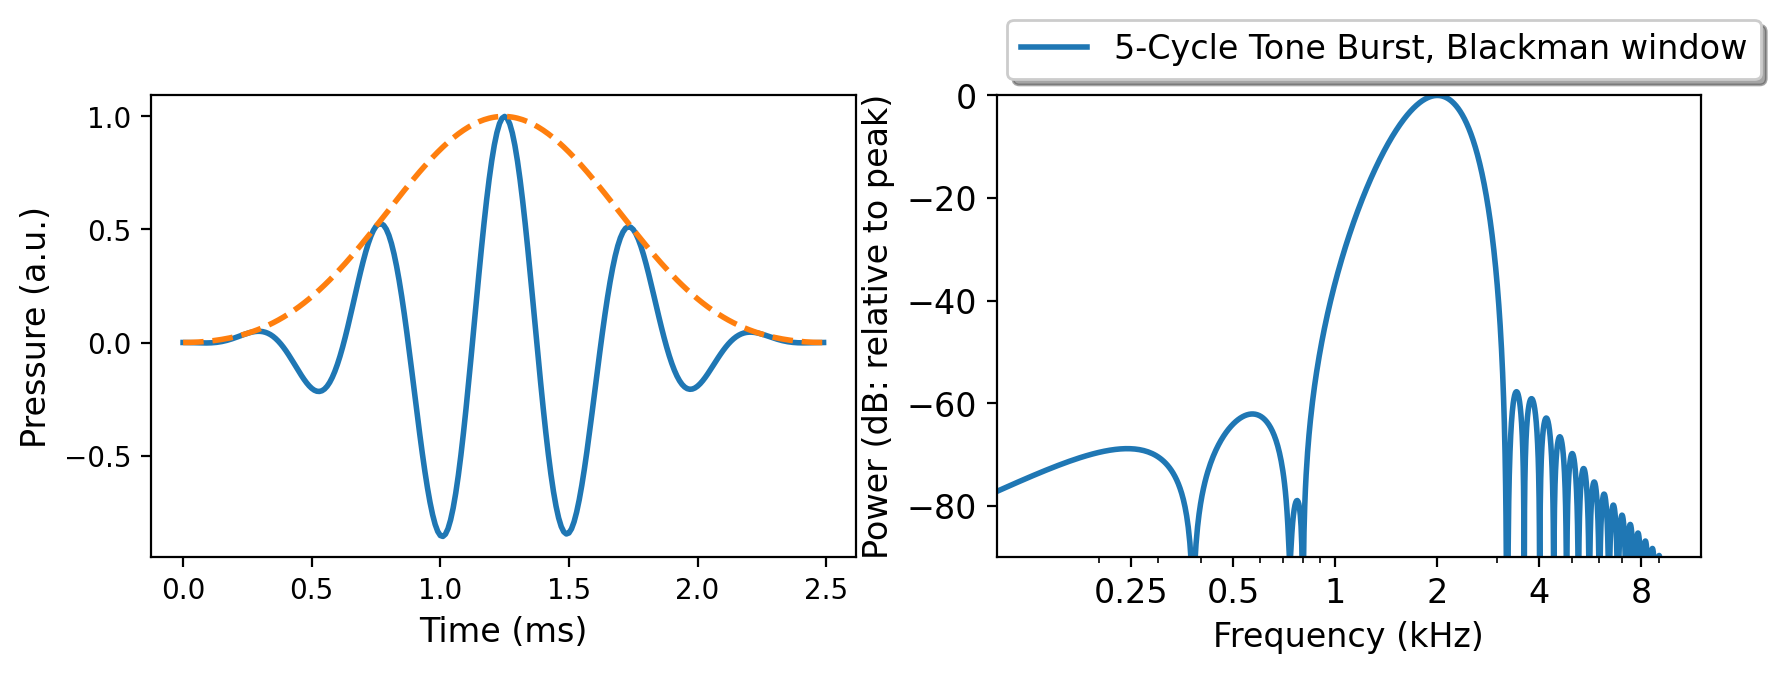

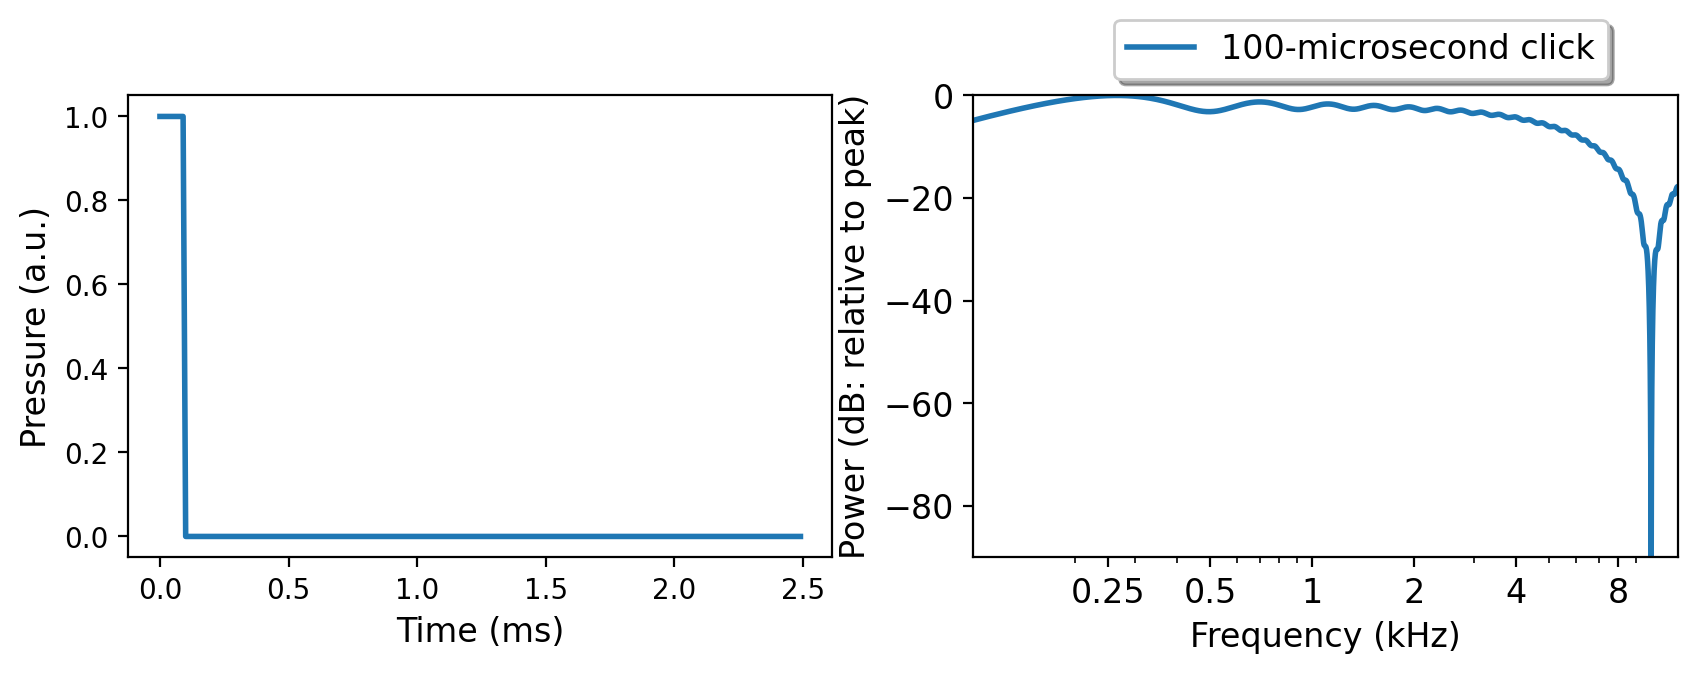

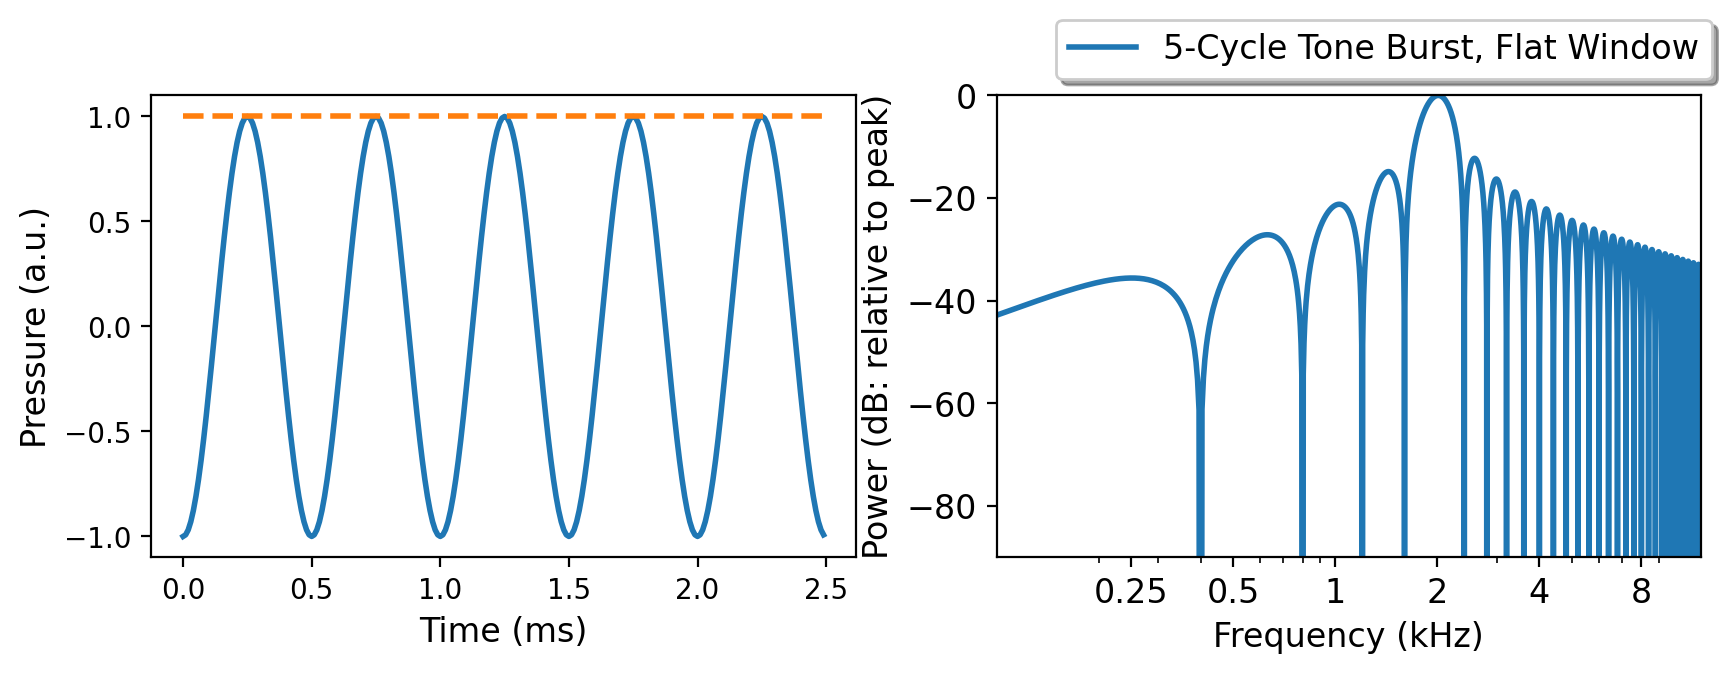

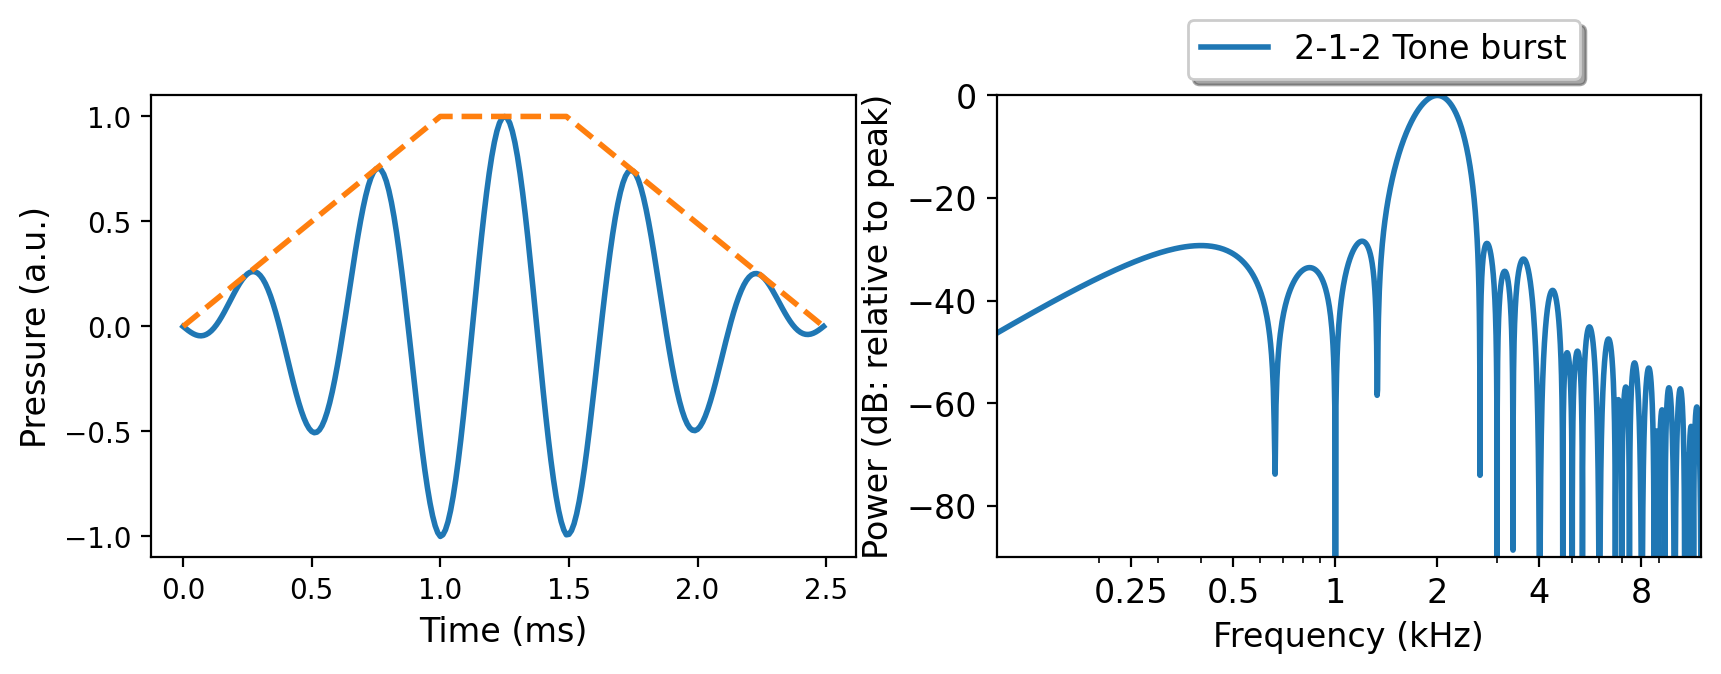

In [11]:
import numpy as np
import pylab as pl
from scipy import signal
from scipy.fft import next_fast_len
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 3)

def rampsound(x, fs, risetime, type='linear'):
    """
    Function to ramp a sound file using a dpss ramp.

    Parameters:
    x : ndarray
        The sound vector.
    fs : float
        Sampling frequency in Hz.
    risetime : float
        Time in seconds for the ramp.
    type  : String
        Default is 'linear'. Also possible are 'blackman', and 'hann'.

    Returns:
    y : ndarray
        The ramped sound vector.
    """
    Nramp = int(np.ceil(fs * risetime * 2)) + 1

    if type == 'linear':
      # For odd Nramp, increase the mid_point by 1 to ensure symmetry
      mid_point = (Nramp + 1) // 2
      ascending = np.linspace(0, 1, mid_point, endpoint=True)
      # skip the first element to avoid duplication of the peak
      descending = np.linspace(1, 0, Nramp - mid_point + 1)[1:]
      w = np.concatenate((ascending, descending))
    elif type == 'blackman':
        w = np.blackman(Nramp)
    elif type == 'hann':
        w = np.hanning(Nramp)
    else:
        raise ValueError("Unsupported window type")

    w = w - w[0]
    w = w / np.max(w)
    half = (Nramp + 1) // 2
    wbig = np.concatenate([
        w[:half],
        np.ones(len(x) - 2 * half),
        w[-half:]
    ])

    if x.ndim == 1:
        y = x * wbig
    else:
        y = x * wbig[:, np.newaxis]

    return y


fs = 100e3 # Sampling rate
fc = 2.0e3  # Stimulus center frequency

fsize = 12

# "Pure" tone akin to those used in audiometry
dur = 250e-3  # This is still a  (longer) tone burst, but used in audiometry
rise = 20e-3
t = np.arange(0, dur, 1./fs)
x_audio = rampsound(-np.cos(2 * np.pi * fc * t), fs, rise)

nfft = next_fast_len(t.shape[0], real=True)

# Spectrum estimation using simple periodograms
f, S_audio = signal.periodogram(x_audio, window='rect', fs=fs, nfft=nfft)

pl.figure()
pl.subplot(1, 2, 1)
pl.plot(t * 1000, x_audio, linewidth=2)
pl.xlabel('Time (ms)', fontsize=fsize)
pl.ylabel('Pressure (a.u.)', fontsize=fsize)

pl.subplot(1, 2, 2)
pl.plot(f / 1000., 10 * np.log10(S_audio / np.max(S_audio)), linewidth=2,
        label='Longer tone à la audiometry')
pl.xscale('log')
pl.xlim((0.1, 12))
pl.ylim((-90, 0))
pl.xticks([0.25, 0.5, 1., 2., 4., 8.],
          labels=['0.25', '0.5', '1', '2', '4', '8'],
          fontsize=fsize)
pl.yticks(fontsize=fsize)
pl.xlabel('Frequency (kHz)', fontsize=fsize)
pl.ylabel('Power (dB: relative to peak)', fontsize=fsize)
pl.legend(fontsize=fsize, loc='upper center', bbox_to_anchor=(0.55, 1.2),
          ncol=1, fancybox=True, shadow=True)




# 5-Cycle Tone burst
dur = 5. / fc
rise = 2.490 / fc
t = np.arange(0, dur, 1./fs)
x_abr = rampsound(-np.cos(2 * np.pi * fc * t), fs, rise,
                  type='blackman')
env = rampsound(np.ones(t.shape), fs, rise, type='blackman')
f, S_abr = signal.periodogram(x_abr, window='rect', fs=fs, nfft=nfft)

pl.figure()
pl.subplot(1, 2, 1)
pl.plot(t * 1000, x_abr, linewidth=2)
pl.plot(t * 1000., env, '--', linewidth=2)
pl.xlabel('Time (ms)', fontsize=fsize)
pl.ylabel('Pressure (a.u.)', fontsize=fsize)
pl.subplot(1, 2, 2)
pl.plot(f / 1000., 10 * np.log10(S_abr/np.max(S_abr)), linewidth=2,
        label='5-Cycle Tone Burst, Blackman window')
pl.xscale('log')
pl.xlim((0.1, 12))
pl.ylim((-90, 0))
pl.xticks([0.25, 0.5, 1., 2., 4., 8.],
          labels=['0.25', '0.5', '1', '2', '4', '8'],
          fontsize=fsize)
pl.yticks(fontsize=fsize)
pl.xlabel('Frequency (kHz)', fontsize=fsize)
pl.ylabel('Power (dB: relative to peak)', fontsize=fsize)
pl.legend(fontsize=fsize, loc='upper center', bbox_to_anchor=(0.55, 1.2),
          ncol=1, fancybox=True, shadow=True)


# 100 microsecond click
dur = 100.0e-6
x_click = np.asarray(t < dur)
# Spectrum estimation using simple periodograms
f, S_click = signal.periodogram(x_click, window='rect', fs=fs, nfft=nfft)

pl.figure()
pl.subplot(1, 2, 1)
pl.plot(t * 1000, x_click, linewidth=2)
pl.xlabel('Time (ms)', fontsize=fsize)
pl.ylabel('Pressure (a.u.)', fontsize=fsize)
pl.subplot(1, 2, 2)
pl.plot(f / 1000., 10 * np.log10(S_click/np.max(S_click)), linewidth=2,
        label='100-microsecond click')
pl.xscale('log')
pl.xlim((0.1, 12))
pl.ylim((-90, 0))
pl.xticks([0.25, 0.5, 1., 2., 4., 8.],
          labels=['0.25', '0.5', '1', '2', '4', '8'],
          fontsize=fsize)
pl.yticks(fontsize=fsize)
pl.xlabel('Frequency (kHz)', fontsize=fsize)
pl.ylabel('Power (dB: relative to peak)', fontsize=fsize)
pl.legend(fontsize=fsize, loc='upper center', bbox_to_anchor=(0.55, 1.2),
          ncol=1, fancybox=True, shadow=True)


# 5 Cycles but no tapering
x_abr_notaper = -np.cos(2 * np.pi * fc * t)
env = np.ones(t.shape)
f, S_abr = signal.periodogram(x_abr_notaper, window='rect', fs=fs, nfft=nfft)
pl.figure()
pl.subplot(1, 2, 1)
pl.plot(t * 1000, x_abr_notaper, linewidth=2)
pl.plot(t * 1000., env, '--', linewidth=2)
pl.xlabel('Time (ms)', fontsize=fsize)
pl.ylabel('Pressure (a.u.)', fontsize=fsize)
pl.subplot(1, 2, 2)
pl.plot(f / 1000., 10 * np.log10(S_abr/np.max(S_abr)), linewidth=2,
        label='5-Cycle Tone Burst, Flat Window')
pl.xscale('log')
pl.xlim((0.1, 12))
pl.ylim((-90, 0))
pl.xticks([0.25, 0.5, 1., 2., 4., 8.],
          labels=['0.25', '0.5', '1', '2', '4', '8'],
          fontsize=fsize)
pl.yticks(fontsize=fsize)
pl.xlabel('Frequency (kHz)', fontsize=fsize)
pl.ylabel('Power (dB: relative to peak)', fontsize=fsize)
pl.legend(fontsize=fsize, loc='upper center', bbox_to_anchor=(0.55, 1.2),
          ncol=1, fancybox=True, shadow=True)


# 2-1-2 tone burst
rise = 2.0 / fc
x_abr_212 = rampsound(-np.cos(2 * np.pi * fc * t), fs, rise)
env = rampsound(np.ones(t.shape), fs, rise, type='linear')
f, S_abr = signal.periodogram(x_abr_212, window='rect', fs=fs, nfft=nfft)
pl.figure()
pl.subplot(1, 2, 1)
pl.plot(t * 1000, x_abr_212, linewidth=2)
pl.plot(t * 1000., env, '--', linewidth=2)
pl.xlabel('Time (ms)', fontsize=fsize)
pl.ylabel('Pressure (a.u.)', fontsize=fsize)
pl.subplot(1, 2, 2)
pl.plot(f / 1000., 10 * np.log10(S_abr/np.max(S_abr)), linewidth=2,
        label='2-1-2 Tone burst')
pl.xscale('log')
pl.xlim((0.1, 12))
pl.ylim((-90, 0))
pl.xticks([0.25, 0.5, 1., 2., 4., 8.],
          labels=['0.25', '0.5', '1', '2', '4', '8'],
          fontsize=fsize)
pl.yticks(fontsize=fsize)
pl.xlabel('Frequency (kHz)', fontsize=fsize)
pl.ylabel('Power (dB: relative to peak)', fontsize=fsize)
pl.legend(fontsize=fsize, loc='upper center', bbox_to_anchor=(0.55, 1.2),
          ncol=1, fancybox=True, shadow=True)
